**Task:** Given basic information (ID, age, gender, income, spending score) about the customers, identify clusters of customers within the data. 


**Part 1: Exploratory Data Analysis** - It is important to develop a basic understanding of your data to avoid making invalid assumptions about the data and analyse clusters more accurately and efficiently in your clustering analysis.

**Import libraries and data**

In [1]:
#Importing libraries

import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
plt.style.use('fivethirtyeight')
%matplotlib inline

import missingno as msno

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics





In [ ]:
#Importing Data - Please download the csv file "Mall_Customers.csv" onto your computer before running this code
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv'])) #convert the csv file into a dataframe
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


**Gain a deeper understanding of your data**

In [ ]:
#Preview Data
df.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#View some summary statistics for the data
df.describe()



,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#More information on the data
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


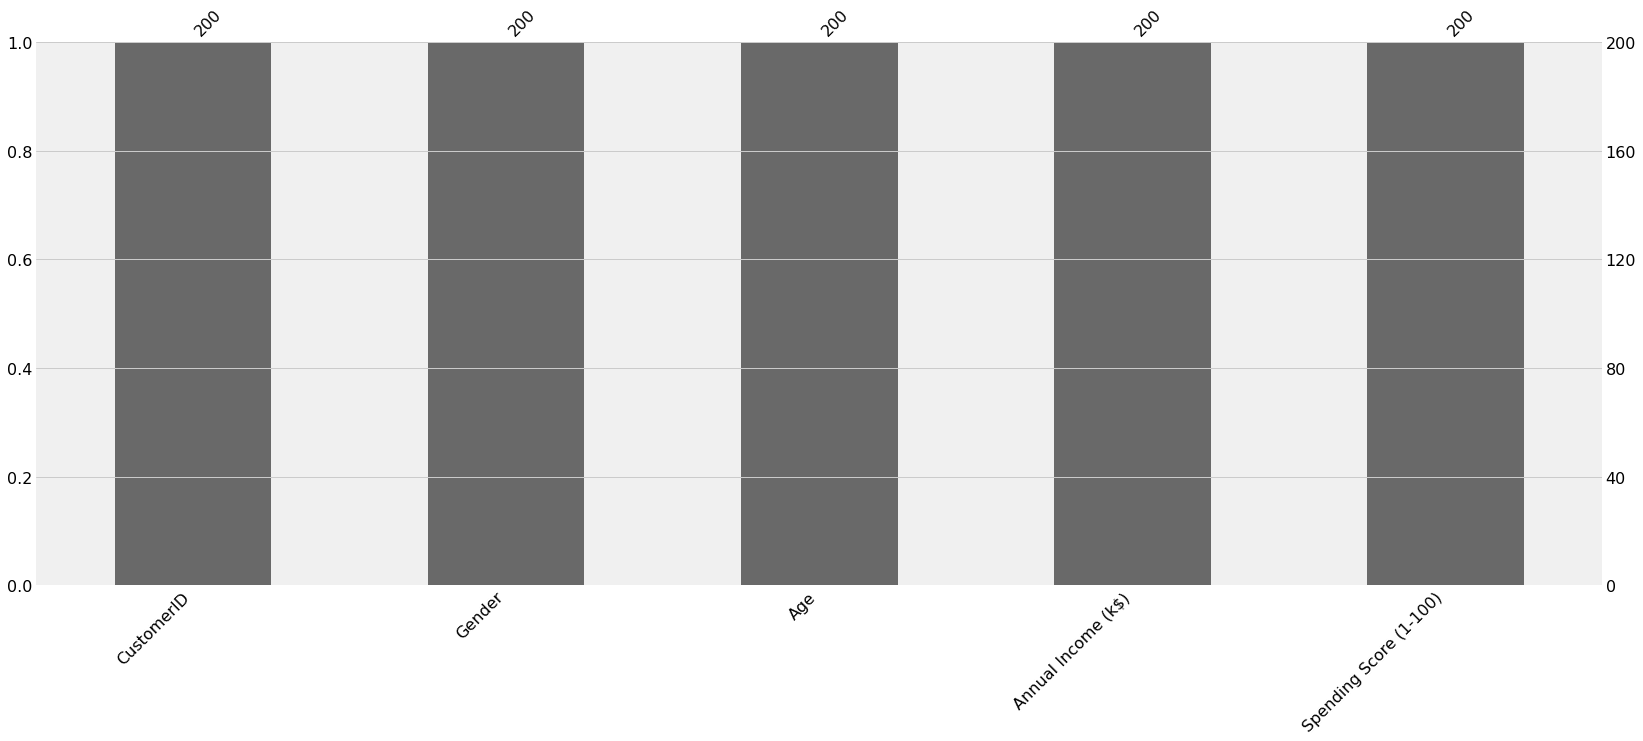

In [ ]:
#Identify if there are missing values in the data
msno.bar(df)
plt.show()

In [ ]:
#Drop columns in data that are not useful for your analysis
df.drop('CustomerID', axis = 1, inplace = True)

Visualise your data with the help of distribution plots.
Try to identify patterns between variables in the data as you plot. 

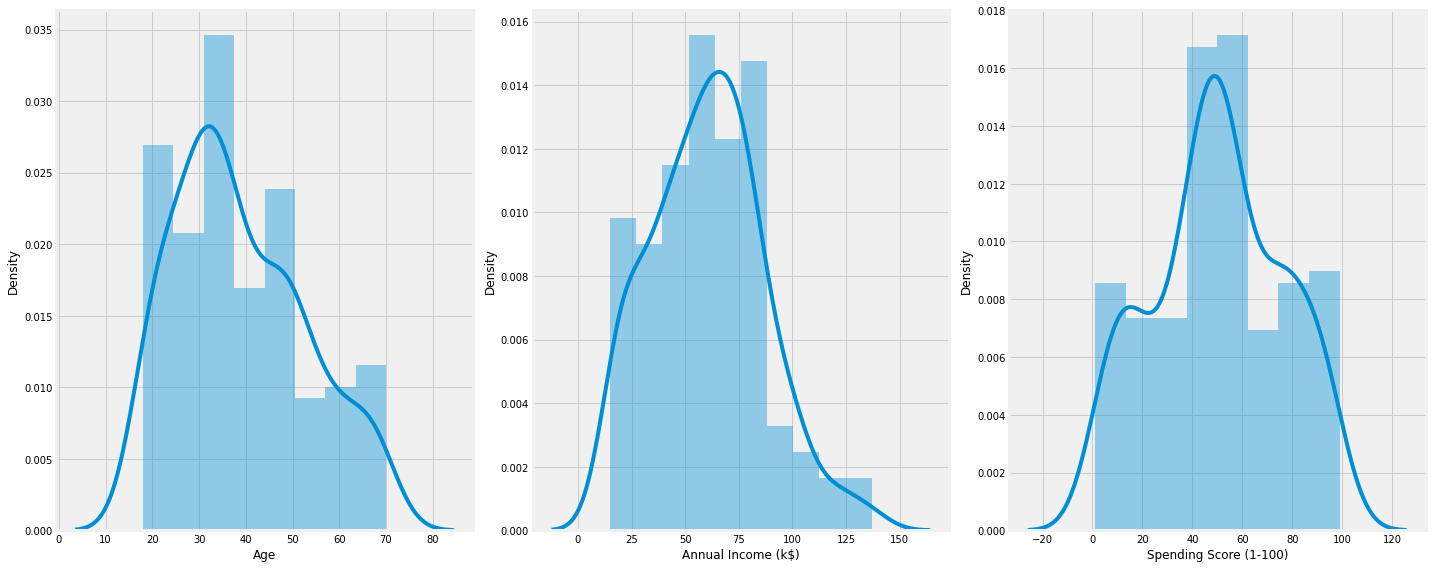

In [ ]:
#Using Distribution Plots to analyse data
plt.figure(figsize = (20, 8))
plotnumber = 1

for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.distplot(df[col])
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

**Interpretations**: 
*   Age group near 30-40 have the highest density.
*   Most customers have income in range of 50-80k.
*   Most of the customers have spending score of 50.







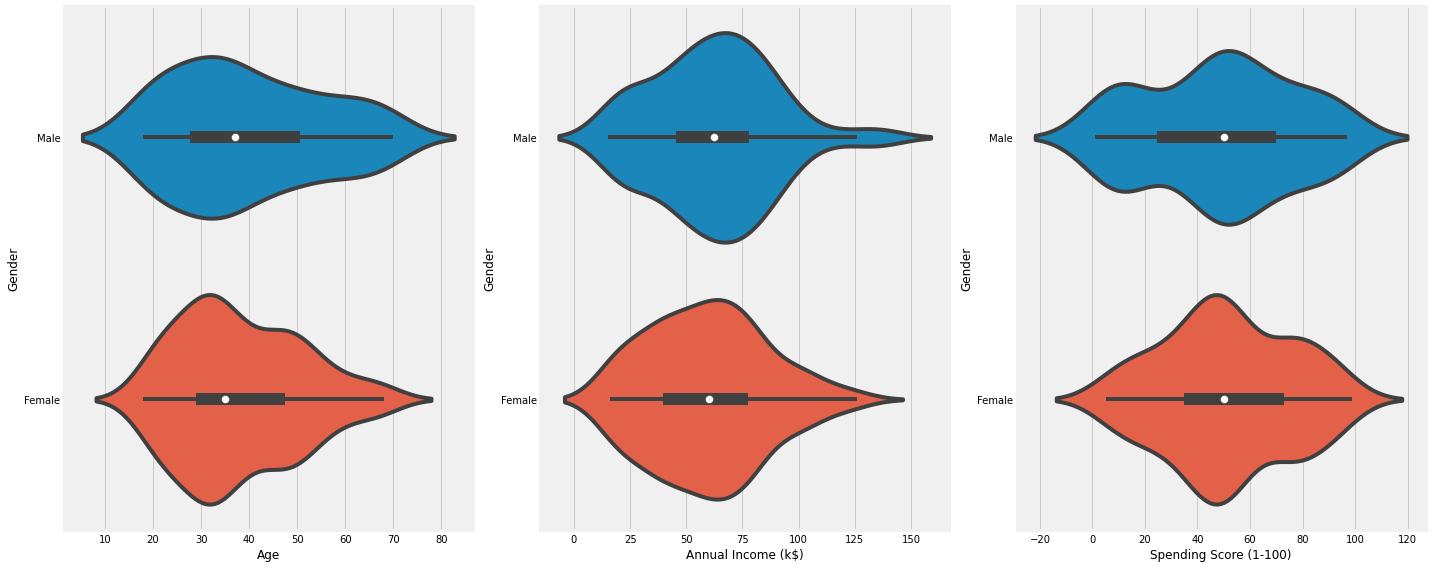

In [ ]:
#Violin Plot
plt.figure(figsize = (20, 8))
plotnumber = 1

for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.violinplot(x = col, y = 'Gender', data = df)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

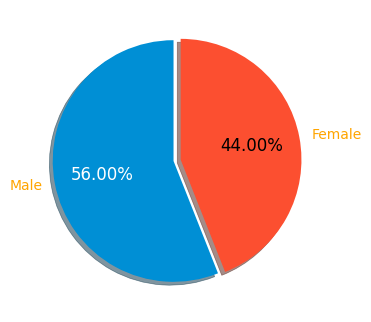

In [ ]:
#More Distribution Plots
#Pie plot for 'Gender'
values = df['Gender'].value_counts()
labels = ['Male', 'Female']

fig, ax = plt.subplots(figsize = (4, 4), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'orange')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

In [ ]:
#Bar Graph for 'Age' 
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 55]

x_age = ['18-25', '26-35', '36-45', '46-55', '55+']
y_age = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),
     len(age_55above.values)]

px.bar(data_frame = df, x = x_age, y = y_age, color = x_age,
       title = 'Number of customers per age group')

In [ ]:
#Scatter Plot
px.scatter(data_frame = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
          title = 'Relation between Annual Income and Spending Score')

In [ ]:
#Try it yourself! 
#Try to create some bar graphs or some other plot of your choice to visualise the relationship between some variables in the data

**Part 2: K-means Clustering**

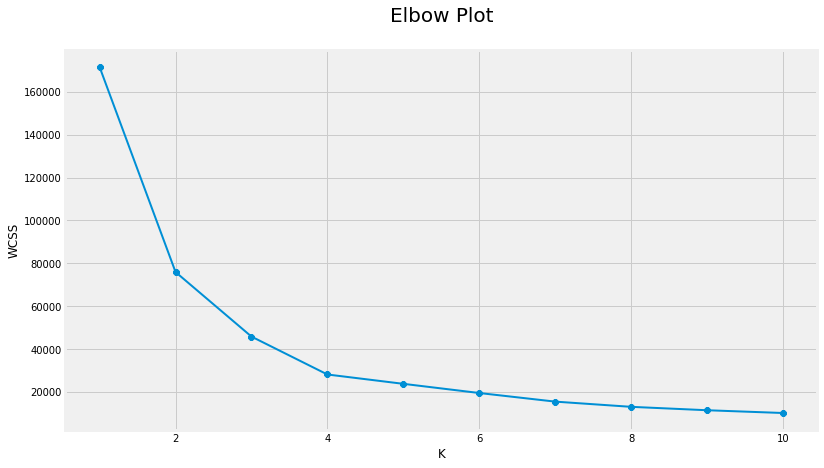

In [ ]:
#You may select all the variables or a subset of them to perform clustering
#In this example, we will perform K means on small groups of two variables and at the end we will do so on all three variables

#Age and Spending Score
#To determine optimal number of clusters in data, we can perform the elbow method:

#Subset of data to perform K means on 
X1 = df.loc[:, ['Age', 'Spending Score (1-100)']].values

#Perform K means and Calculate within cluster sum of squares (wcss) or intra-cluster variance for number of clusters between the range of 1 to 10
wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X1) 
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()  

Within cluster sum of squares (WCSS) or intra cluster variance is the sum of squared distance between each data point and the centroid in a cluster. The centroid is the midpoint of a cluster. When we plot the WCSS with the K value (K = number of clusters), the plot will appear to take the shape of an elbow. This is becase as the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value i.e.the optimal number of clusters.

In [ ]:
#Perform K means based on optimal number of clusters identified and print the cluster number assigned to each datapoint
kmeans = KMeans(n_clusters = 4)
labels = kmeans.fit_predict(X1)
print(labels)

[0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 0 0 3 1 0 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3
 1 3 1 2 1 2 0 3 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 1 0 1 2 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 2 1
 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [ ]:
#Print cluster centres according to variables identified (x-axis: Age, y-axis: Spending Score)
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [43.29166667 15.02083333]]


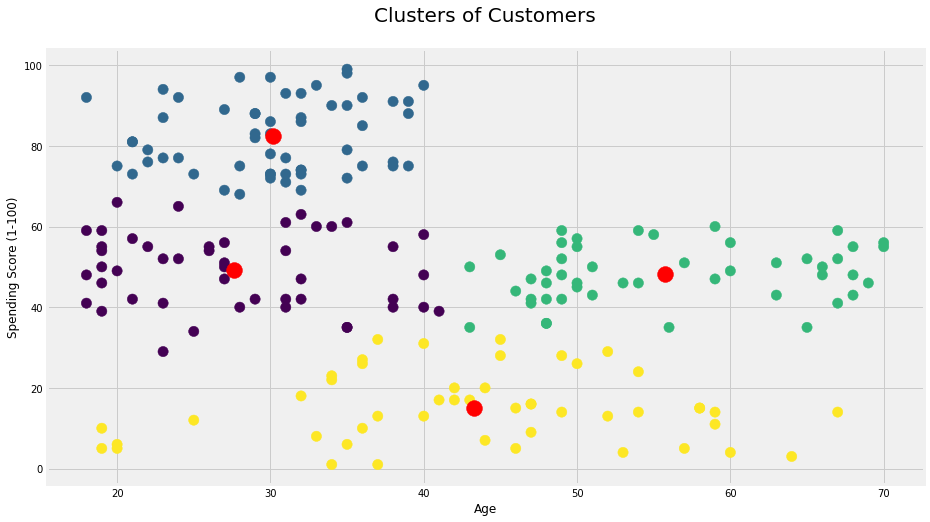

In [ ]:
#Color-coded scatter plot to visualize clusters
plt.figure(figsize = (14, 8))

plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters of Customers\n', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


**Clusters we have identified**: Approximately 50% of younger customers aged 30 years on average are high spenders, whereas the other 50% are midrange spenders. Another group of midrange spenders identified are senior customers aged 55 on average. The lowest spenders are middle aged customers aged 43 on average, however, the cluster is much more spread out and we have some outliers. 

**Try it yourself!**: Using the guide above, perform K means on other set of variables in the data and form your own interpretations of the clusters. We will compare our results with our peers later :) 

In [ ]:
#Age and Annual Income

#Elbow Plot
X2 = df.loc[:, ['Age', 'Annual Income (k$)']].values

In [ ]:
#Perform Kmeans and print the cluster number assigned to each datapoint

In [ ]:
#Print cluster centres

In [ ]:
#Color-coded scatter plot to visualize clusters

In [ ]:
#Annual Income and Spending Scores

#Elbow Method
X3 = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

In [ ]:
#Perform Kmeans and print the cluster number assigned to each datapoint

In [ ]:
#Print cluster centres

In [ ]:
#Color-coded scatter plot to visualize clusters

In [ ]:
#All three variables

#Elbow Method
X4 = df.iloc[:, 1:]

In [ ]:
#Perform Kmeans

In [ ]:
#Color-coded scatter plot to visualize clusters - A guide to plotting 3D scatter plots 
fig = px.scatter_3d(X4, x="Annual Income (k$)", y="Spending Score (1-100)", z="Age",
                    color = 'label', size = 'label')
fig.show()

**Part 3: Hierarchical Clustering** - Spending Score and Annual Income




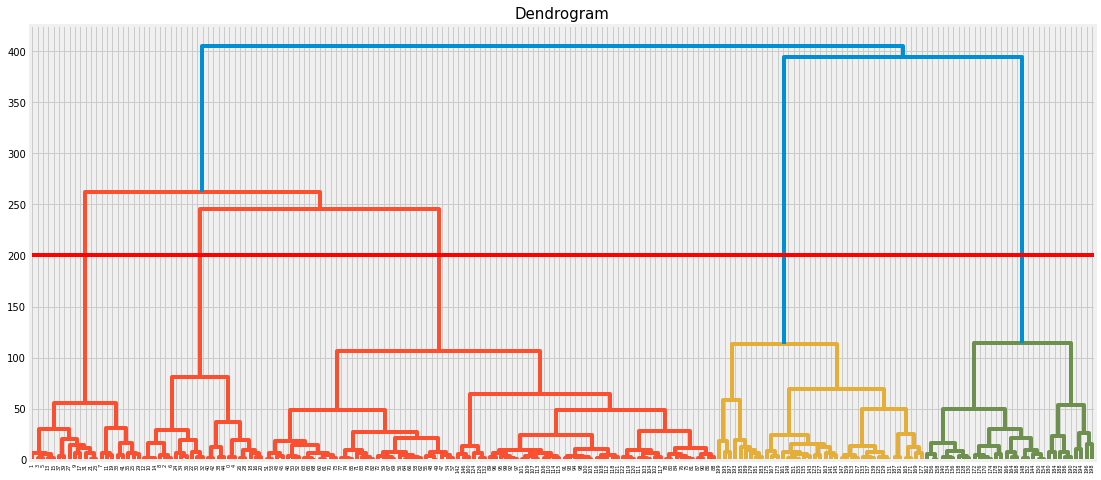

In [37]:
#Plot dendrograms to see how clusters merge together
plt.figure(figsize = (17, 8))

dendo = dendrogram(linkage(X3, method = 'ward')) #try 'average', 'single', 'complete' --> these methods may yield different results 
#explore: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html for more methods 
  
plt.title('Dendrogram', fontsize = 15)

#add this code after you have determined how you want to cut the dendrogram --> replace y with the height of the dendrogram at which you would like to draw a horizontal line
plt.axhline(y = 200, color = 'r', linestyle = '-') 

plt.show() 


The height or the y-axis of the dendrogram represents the distance between clusters, while the x-axis represents the data points plotted according to their distances from each other (in this case we use Euclidean distance). To identify the optimal number of clusters, we look for the longest vertical lines across the dendrogram. Longer vertical lines between different levels of merging of clusters implies that a cluster may be much further away from another cluster or datapoint. Hence, it may not be optimal to merge them together. Once we have identified a space containing the longest vertical lines across the dendrogram, we can draw a horizontal line across that space. Below the horizontal line thus represents the different clusters.  


In [38]:
#Perform Hierarchical Agglomerative Clustering once you have identified the optimal number of clusters
agc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward') #modify n_clusters value according to the number of clusters you have obtained from your dendrogram
#explore: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html for different linkage methods
#if you are keen, you may also explore other distance measures aside from Euclidean Clustering 
labels = agc.fit_predict(X3)

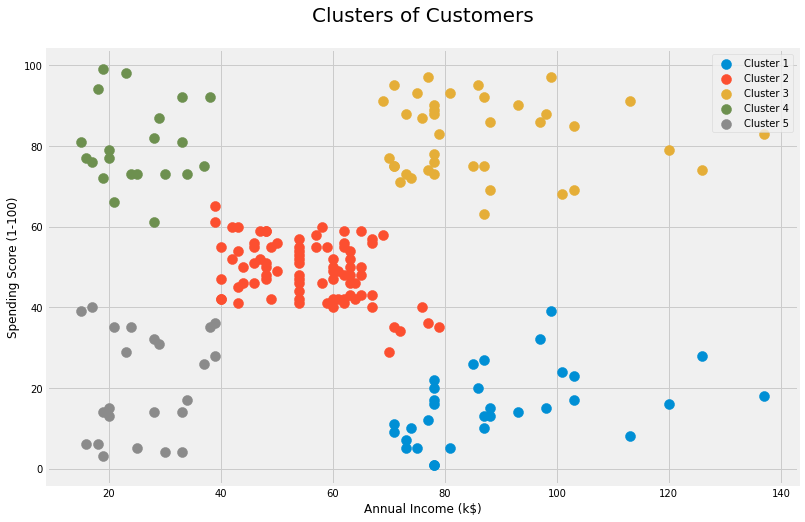

In [39]:
#Color-coded scatter plot to visualize clusters
plt.figure(figsize = (12, 8))

plt.scatter(X3[labels == 0,0], X3[labels == 0,1], label = 'Cluster 1', s = 100)
plt.scatter(X3[labels == 1,0], X3[labels == 1,1], label = 'Cluster 2', s = 100)
plt.scatter(X3[labels == 2,0], X3[labels == 2,1], label = 'Cluster 3', s = 100)
plt.scatter(X3[labels == 3,0], X3[labels == 3,1], label = 'Cluster 4', s = 100)
plt.scatter(X3[labels == 4,0], X3[labels == 4,1], label = 'Cluster 5', s = 100)
#plt.scatter(X3[labels == 5,0], X3[labels == 5,1], label = 'Cluster 6', s = 100)
#plt.scatter(X3[labels == 6,0], X3[labels == 6,1], label = 'Cluster 7', s = 100)

plt.legend(loc = 'best')
plt.title('Clusters of Customers\n ', fontsize = 20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()